<a href="https://colab.research.google.com/github/vpagonis/CRCbook/blob/main/Chapter_13_Analysis_of_Experimental_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 13 - Analysis of Experimental Data

This notebook contains the code for the example problems found in Chapter 13.

Example 13.1: Estimating uncertainties in measured data

---------------------------- CODE OUTPUT ----------------------------- 

The first few lines in the file are:

       x      y
0  0.644  1.938
1  0.647  1.944
2  0.655  1.927
3  0.647  2.027
4  0.654  1.913

Mean t = 0.65 +/- 0.006  s
CV% of t values = 0.92  %

Mean y = 1.991 +/- 0.057  m
CV% of y values = 3  %

Mean g = 9.422  m/s^2

Mean g= 9.425 +/- 0.334  m/s^2
CV% of g = 3.54  %


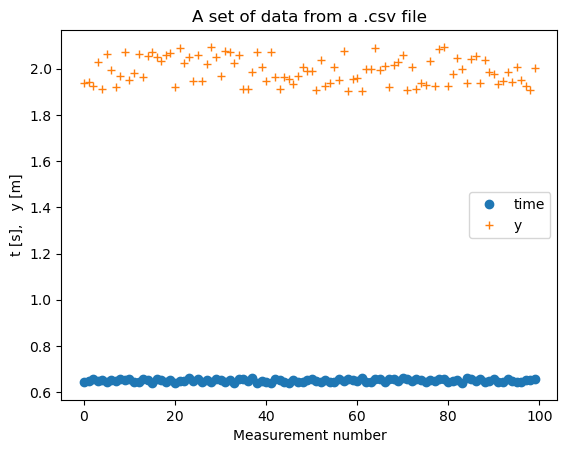

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print('-'*28,'CODE OUTPUT','-'*29,'\n')

# load the .csv file from GitHub
url='https://github.com/vpagonis/Python-codes/raw/main/data2.csv'

# read the contents of the file using pandas library
# The data in each row in the file are separated by commas
df = pd.read_table(url,delimiter=',')

# look at the contents of the first few lines of the file
print('The first few lines in the file are:\n')
print(pd.DataFrame.head(df))

# store columns #1 and #2 to NumPy arrays t_data, y_data
t_data = df['x'].to_numpy()
y_data = df['y'].to_numpy()

# find the number of data rows in the file
size = range(len(t_data))

#plot the data
plt.plot(size,t_data,'o',label='time')
plt.plot(size,y_data,'+',label='y')
plt.xlabel('Measurement number')
plt.ylabel('t [s],   y [m]')
plt.title('A set of data from a .csv file')
plt.legend()

# evaluate the average and standard deviation and CV[%]
tavg = np.mean(t_data)
dt = np.std(t_data)
print('\nMean t =',round(tavg,3),'+/-',round(dt,3),' s')
print('CV% of t values =',round(100*dt/tavg,2),' %')

yavg = np.mean(y_data)
dy = np.std(y_data)
print('\nMean y =',round(yavg,3),'+/-',round(dy,3),' m')
print('CV% of y values =',round(100*dy/yavg),' %')

print('\nMean g =',round(2*yavg/tavg**2,3),' m/s^2')

ratios = 2*y_data/(t_data**2)
print('\nMean g=',round(np.mean(ratios),3),'+/-',\
round(np.std(ratios),3),' m/s^2')
print('CV% of g =',round(100*np.std(ratios)/np.mean(ratios),2),' %')

plt.show()

Example 13.2: Uncertainty propagation in a free fall experiment

In [ ]:
y = 2.003
sigma_y = 0.0005

t = 0.64
sigma_t = 0.02

def g(y,t):
    return 2*y/t**2

g_mean = g(y,t)
g_min = g(y + sigma_y,t + sigma_t)
g_max = g(y - sigma_y,t - sigma_t)
sigma_g = (g_max - g_min)/2

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('g = ', round(g_mean,2),' m/s^2')
print('sigma_g = ', round(sigma_g,2),' m/s^2')


---------------------------- CODE OUTPUT ----------------------------- 

g =  9.78  m/s^2
sigma_g =  0.61  m/s^2


Example 13.3: Linear regression with Python

---------------------------- CODE OUTPUT ----------------------------- 

The slope is  2.03 +/- 0.074  m/s^2
The y-intercept is  0.19 +/- 0.018  m/s
The R^2 value is  0.9961


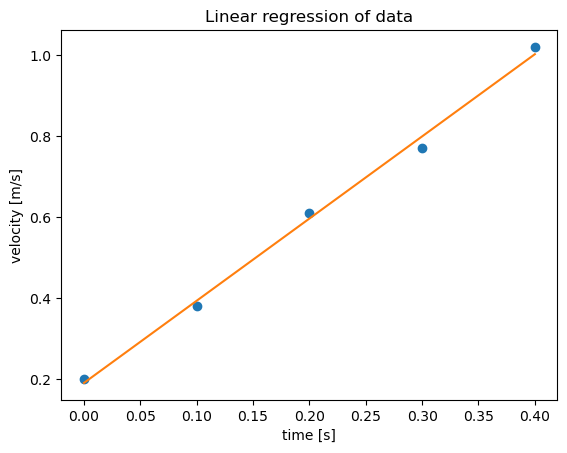

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

time = np.array([0.0, 0.1, 0.2, 0.3, 0.4])
velocity = np.array([0.2, 0.38, 0.61, 0.77, 1.02])

reg = linregress(time, velocity)

slope = reg.slope                   #slope
y_int = reg.intercept               #y-intercept
r_sq = reg.rvalue**2                #R-squared value
slope_err = reg.stderr              #standard error of slope
y_int_err = reg.intercept_stderr    #standard error of y-int.

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The slope is ', round(slope,3), '+/-', round(slope_err,3),' m/s^2')
print('The y-intercept is ', round(y_int,3), '+/-',\
round(y_int_err,3),' m/s')
print('The R^2 value is ', round(r_sq,4))

plt.plot(time, velocity,'o')
plt.plot(time, slope*time + y_int)
plt.xlabel('time [s]')
plt.ylabel('velocity [m/s]')
plt.title('Linear regression of data')
plt.show()

Example 13.4: Drag force and feature engineering

---------------------------- CODE OUTPUT ----------------------------- 


Analysis with feature engineering:
The drag force constant is  0.434 +/- 0.026
The y-intercept is  -0.002 +/- 0.004
The R^2 value is  0.9897

Analysis assuming a linear relationship:
The drag force constant is  0.257 +/- 0.041
The y-intercept is  -0.032 +/- 0.013
The R^2 value is  0.931


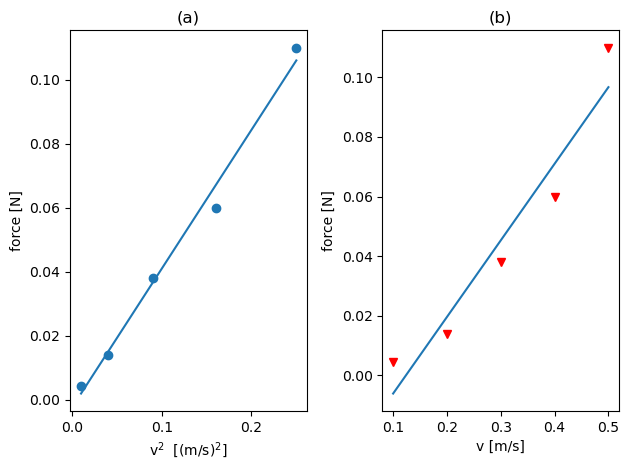

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

velocity = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
force = np.array([0.0044, 0.014, 0.038, 0.060, 0.110])

# Use v^2 as the independent variable for feature engineering
# Use lingress to find the best fit parameters

reg = linregress(velocity**2, force)

# evaluate and print best fit parameters and R-squared
slope = reg.slope                   #slope
y_int = reg.intercept               #y-intercept
r_sq = reg.rvalue**2                #R-squared value
slope_err = reg.stderr              #standard error of slope
y_int_err = reg.intercept_stderr    #standard error of y-int.

print('-'*28,'CODE OUTPUT','-'*29,'\n')

print('\nAnalysis with feature engineering:')
print('The drag force constant is ', round(slope,3),\
'+/-', round(slope_err,3))
print('The y-intercept is ', round(y_int,3), '+/-',\
round(y_int_err,3))
print('The R^2 value is ', round(r_sq,4))

# plot data and best fit to the data
plt.subplot(1,2,1)
plt.scatter(velocity**2, force)
plt.plot(velocity**2, slope*(velocity**2) + y_int)
plt.xlabel(r'v$^{2}$  [(m/s)$^{2}$]')
plt.ylabel('force [N]')
plt.title('(a)')

# Repeat assuming a linear relationship
reg = linregress(velocity, force)

slope = reg.slope                   #slope
y_int = reg.intercept               #y-intercept
r_sq = reg.rvalue**2                #R-squared value
slope_err = reg.stderr              #standard error of slope
y_int_err = reg.intercept_stderr    #standard error of y-int.

print('\nAnalysis assuming a linear relationship:')
print('The drag force constant is ', round(slope,3),\
'+/-', round(slope_err,3))
print('The y-intercept is ', round(y_int,3),\
'+/-',round( y_int_err,3))
print('The R^2 value is ', round(r_sq,3))

plt.subplot(1,2,2)
plt.plot(velocity, force,'rv')
plt.plot(velocity, slope*(velocity) + y_int)
plt.xlabel('v [m/s]')
plt.ylabel('force [N]')
plt.title('(b)')
plt.tight_layout()
plt.show()

Example 13.5: Drag force and log-log plots

---------------------------- CODE OUTPUT ----------------------------- 

The power law is n=  1.99 +/- 0.09

a =  0.4 +/- 0.14

The R^2 value is  0.993


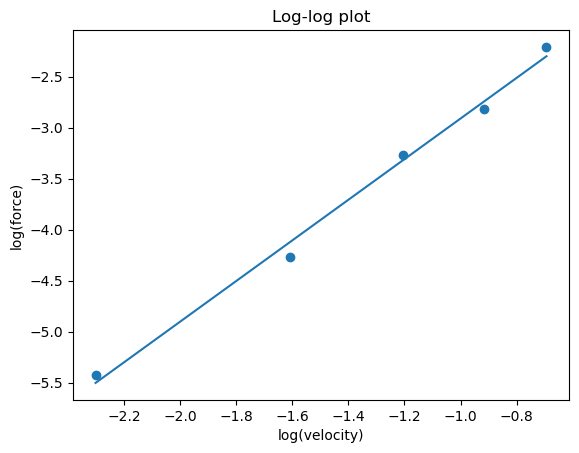

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

velocity = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
force = np.array([0.0044, 0.014, 0.038, 0.060, 0.110])

reg = linregress(np.log(velocity),np.log(force))

slope = reg.slope                   #slope
y_int = reg.intercept               #y-intercept
r_sq = reg.rvalue**2                #R-squared value
slope_err = reg.stderr              #standard error of slope
y_int_err = reg.intercept_stderr    #standard error of y-int.

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The power law is n= ', round(slope,2), '+/-',\
round(slope_err,2))
print('\na = ', round(np.exp(y_int),2), '+/-', round(y_int_err,2))
print('\nThe R^2 value is ', round(r_sq,3))

plt.scatter(np.log(velocity),np.log(force))
plt.plot(np.log(velocity), slope*(np.log(velocity)) + y_int)
plt.xlabel('log(velocity)')
plt.ylabel('log(force)')
plt.title('Log-log plot')
plt.show()

Example 13.6: Radioactive decay

---------------------------- CODE OUTPUT ----------------------------- 

The decay constant is lambda =( -0.24 +/- 0.03 ) s^-1

N_0 =  96.5 +/- 0.07  particles

The R^2 value is  0.964


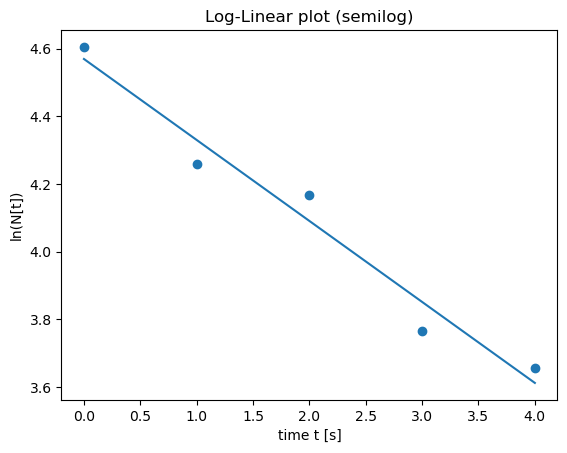

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

t = np.array([0, 1, 2, 3, 4])
N = np.array([100.0,  70.8,  64.6,  43.2, 38.7])

# find best fit line
reg = linregress(t,np.log(N))

slope = reg.slope                   #slope
y_int = reg.intercept               #y-intercept
r_sq = reg.rvalue**2                #R-squared value
slope_err = reg.stderr              #standard error of slope
y_int_err = reg.intercept_stderr    #standard error of y-int.

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print(r'The decay constant is lambda =(', round(slope,2),\
'+/-', round(slope_err,2),') s^-1')
print('\nN_0 = ', round(np.exp(y_int),2), '+/-', round(y_int_err,2),\
' particles')
print('\nThe R^2 value is ', round(r_sq,3))

plt.scatter(t, np.log(N))
plt.plot(t, slope*(t) + y_int)
plt.xlabel('time t [s]')
plt.ylabel('ln(N[t])')
plt.title('Log-Linear plot (semilog)')
plt.show()

Example 13.7: Predicting student understanding

---------------------------- CODE OUTPUT ----------------------------- 

a, b, c = [0.43487365 0.56213798 0.03800565]

A student with a 0.75 on the midterm and a 0.90 on the final exam
is predicted to have the grade:  0.87


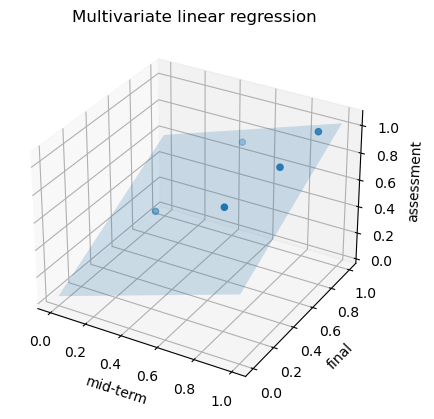

In [ ]:
import numpy as np
import matplotlib. pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.optimize import curve_fit

test_data = np.array([
    [0.25,0.90, 0.80, 0.50, 0.63],
    [0.5,0.95,0.75,0.92,0.51]
    ])

assessment_score = np.array([0.43,0.97,0.80,0.77,0.60])

def fit_func(x,a,b, c):
    return a*x[0] + b*x[1] + c

popt, pcov = curve_fit(fit_func, test_data, assessment_score)

a, b, c = popt

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('a, b, c =', popt)
print('')
print('A student with a 0.75 on the midterm and a 0.90 on the final exam')
print('is predicted to have the grade: ', round(a*0.75 + b*0.90 + c,2))

xx, yy = np.meshgrid(np.linspace(0,1,10),np.linspace(0,1,10))

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(xx,yy,a*xx+b*yy+c,alpha=0.2)
ax.scatter(test_data[0],test_data[1],assessment_score)
ax.set_xlabel('mid-term')
ax.set_ylabel('final')
ax.set_zlabel('assessment')
ax.set_title('Multivariate linear regression')
plt.show()

Example 13.8: Nonlinear regression - Fitting the cosmic radiation data

---------------------------- CODE OUTPUT ----------------------------- 

The first few lines of the data are:

   Wavelength   Intensity
0    0.516338    0.216933
1    0.548758    0.282212
2    0.573032    0.343468
3    0.593078    0.408856
4    0.619386    0.461920

The value of A from best fit = 1928.5  a.u.

Temperature of background radiation from best fit = 2.71  K


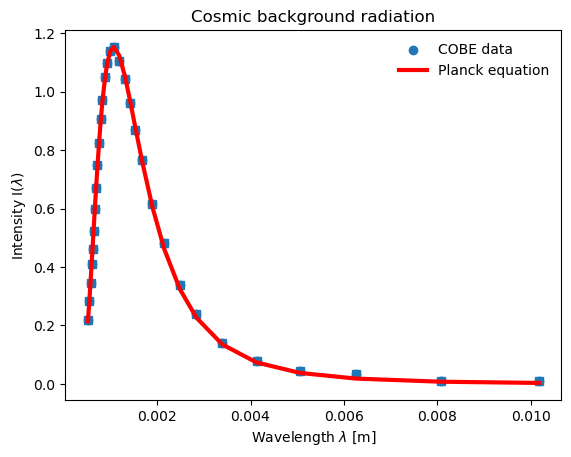

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd
print('-'*28,'CODE OUTPUT','-'*29,'\n')

# experimental data adapted from
# http://hyperphysics.phy-astr.gsu.edu/hbase/bkg3k.html#c1

# read the contents of the file using pandas library
# The data in each row in the file are separated by commas
url='https://github.com/vpagonis/Python-Codes/raw/main/3K.txt'
df =pd.read_table(url,delimiter=',')

# look at the contents of the first few lines of the file
print('The first few lines of the data are:\n')
print(pd.DataFrame.head(df))

# store columns #1 and #2 to NumPy arrays x_data, y_data
x_data = df.iloc[:, 0].to_numpy()
x_data = 0.001*x_data  # wavelength is in mm, convert to m
y_data = df.iloc[:, 1].to_numpy()

plt.plot(x_data,y_data,'s')

h = 6.626e-34    # Planck constant in J s
k = 1.380649e-23 # Boltzmann constant in J/K
c = 2.998e8      # speed of light m/s

# T = black body Temperature in K
# x = wavelength is in meters
# y = intensity
# A = scaling factor for intensity

# function for evaluating the Planck black body equation
def Planck(x,T,A):
    return (A*2*h*c**2.0/x**5.0)*1/(np.exp(h*c/(x*k*T))-1)

inis = [2.0,400]  # starting values (T, A) for the fit

# find optimal parameters
# params are the best fit values for the parameters (T,A)
# cov is the covariance of the best fit parameters
params, cov =optimize.curve_fit(Planck,x_data,y_data,inis)

plt.scatter(x_data, y_data, label='COBE data')
plt.plot(x_data, Planck(x_data, *params),
c='r',linewidth=3, label='Planck equation')

plt.xlabel('Wavelength $\lambda$ [m]')
plt.ylabel(r'Intensity I(${\lambda}$)')
plt.title('Cosmic background radiation')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)

print('\nThe value of A from \
best fit =',round(params[1],2),' a.u.')

print('\nTemperature of background radiation from \
best fit =',round(params[0],2),' K')
plt.show()

Example 13.9: Fourier transforms

---------------------------- CODE OUTPUT ----------------------------- 

The Fourier transform is:
 (omega + (omega + I)*exp(2*I*omega) - I)*exp(-I*omega)/(pi*omega**3)


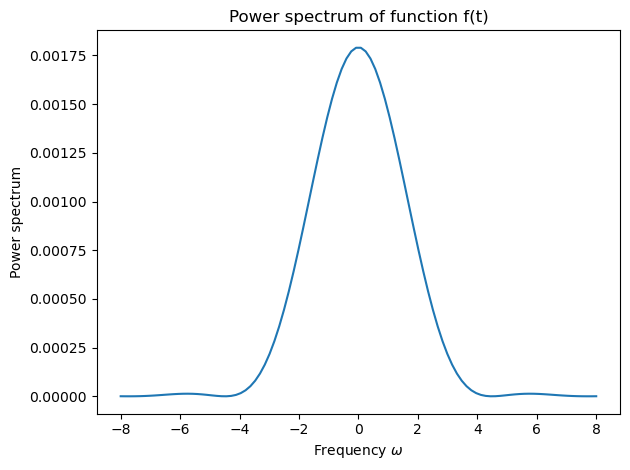

In [ ]:
from sympy.integrals.transforms import _fourier_transform
from sympy import exp, pi, symbols, I, Piecewise
import numpy as np
import matplotlib.pyplot as plt

t, omega = symbols('t, omega')
f = Piecewise((0,t<-1),(0, t> 1), (t**2 - 1,True))

F = _fourier_transform(f, t, omega, a = 1/(2*pi), b = -1,\
name ='ft', simplify =True)

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The Fourier transform is:\n',F.args[0][0])

omega = np.linspace(-8,8,100)

ft = 2*(omega*np.cos(omega)-np.sin(omega))/(2*np.pi*omega**3)

plt.plot(omega,ft*ft/(2*np.pi))
plt.xlabel(r'Frequency $\omega$')
plt.ylabel(r'Power spectrum')
plt.title('Power spectrum of function f(t)')
plt.tight_layout()
plt.show()

Example 13.10: The discrete Fourier transform

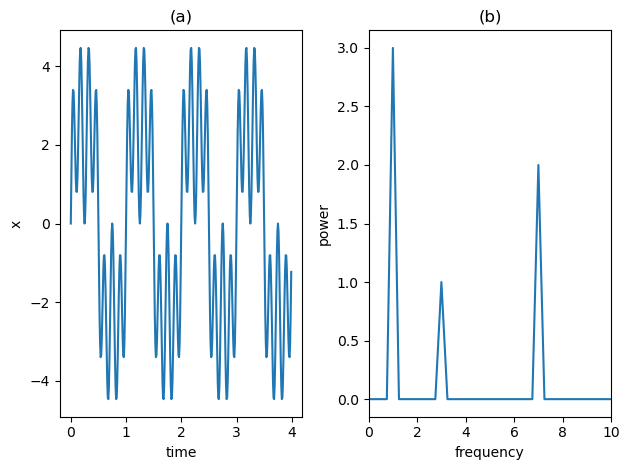

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, fftfreq

f1, f2, f3 = 1.0, 3.0, 7.0
dt = 0.01

t = np.arange(0,4,dt)
x = 3.0*np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) +\
2*np.sin(2*np.pi*f3*t)

N = len(t)
plt.subplot(1,2,1)
plt.plot(t,x)
plt.xlabel('time')
plt.ylabel('x')
plt.title('(a)')

x_ft = fft(x)
freqs = fftfreq(N,0.01)[:N//2]
power_spec = 2.0/N * np.abs(x_ft[:N//2])

plt.subplot(1,2,2)
plt.plot(freqs, power_spec)
plt.xlim((0,10));
plt.xlabel('frequency')
plt.ylabel('power')
plt.title('(b)')
plt.tight_layout()

plt.show()

Example 13.11: Discrete probabilities in quantum mechanics

In [ ]:
import numpy as np

M = np.array([-1,-1,0,1,0,1,1,1,0,1])

unique, counts = np.unique(M, return_counts=True)
probs = counts/len(M)
avg = sum(unique*probs)
var = sum((unique-avg)**2*probs)

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The elements in the set are ', unique)
print('\nThe probability of each element is ', probs)
print('\nThe expectation value is ', round(avg,2))
print('\nThe variance is ', round(var,2))

---------------------------- CODE OUTPUT ----------------------------- 

The elements in the set are  [-1  0  1]

The probability of each element is  [0.2 0.3 0.5]

The expectation value is  0.3

The variance is  0.61


Example 13.12: Human height

In [ ]:
from sympy import pi, sqrt, exp, oo, symbols, integrate

x = symbols('x')

mu_men = 70
s_men = 3
mu_women = 64.5
s_women = 2.5

f_men = 1/(s_men*sqrt(2*pi))*exp(-0.5*((x-mu_men)/s_men)**2)
f_women =  1/(s_women*sqrt(2*pi))*exp(-0.5*((x-mu_women)/s_women)**2)

p_men = integrate(f_men, (x,-oo,67.3)).evalf()
p_women = integrate(f_women, (x,-oo,62.8)).evalf()

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The probability for men is ', round(p_men,3))
print('The probability for women is ',round( p_women,3))

---------------------------- CODE OUTPUT ----------------------------- 

The probability for men is  0.184
The probability for women is  0.248


Example 13.13: Probability distributions in classical mechanics

In [ ]:
import numpy as np
from sympy import symbols, integrate, sqrt, simplify

print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, L = symbols('x,L', positive=True)

p = 1/(2*sqrt(L*x))

meanx = integrate(x*p,(x,0,L))

print('\nThe mean is = ', simplify(meanx))

variance = integrate((x - meanx)**2*p,(x,0,L))
std = sqrt(variance)

print('\nThe standard deviation is = ', simplify(std))

---------------------------- CODE OUTPUT ----------------------------- 


The mean is =  L/3

The standard deviation is =  2*sqrt(5)*L/15


Example 13.14: Particle spin probabilities

In [ ]:
from scipy.special import binom

n = 20
x = 14
p = 2/3
q = 1/3

C = binom(n,x)

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The probability is ', round(C*p**14*q**6,2))

---------------------------- CODE OUTPUT ----------------------------- 

The probability is  0.18


Example 13.15: The importance of repetition in experimentation

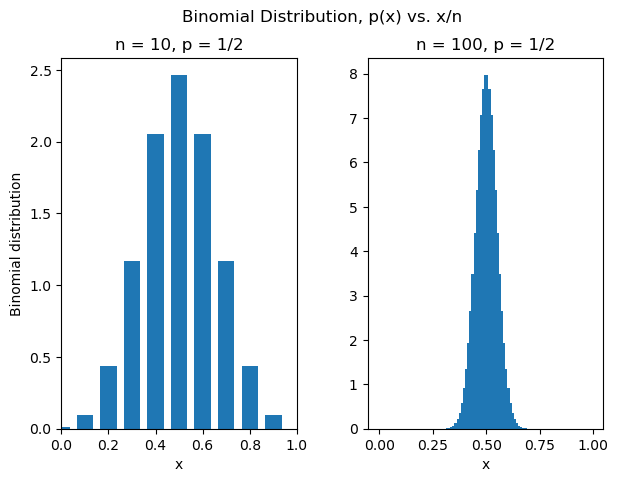

In [ ]:
from scipy.stats import binom
import matplotlib.pyplot as plt

p = 0.5

def dist(r,n,p):
    return [binom.pmf(item,n, p) for item in r]

dist1 = np.array(dist(np.arange(10),10,p))
dist2 = np.array(dist(np.arange(101),101,p))

fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.tight_layout(pad = 2.0)
fig.suptitle('Binomial Distribution, p(x) vs. x/n')
fig.subplots_adjust(top=0.88)


ax[0].bar(np.arange(10)/10,10*dist1, width = 0.07);
ax[0].set_title('n = 10, p = 1/2')
ax[0].set_xbound(0,1)
ax[0].set_xlabel('x')
ax[0].set_ylabel('Binomial distribution')

ax[1].set_xlabel('x')
ax[1].bar(np.arange(101)/101,101*dist2, width= 0.01);
ax[1].set_title('n = 100, p = 1/2')
ax[0].set_xbound(0,1)

plt.show()

Example 13.16: The mean and standard deviation of normally distributed random numbers

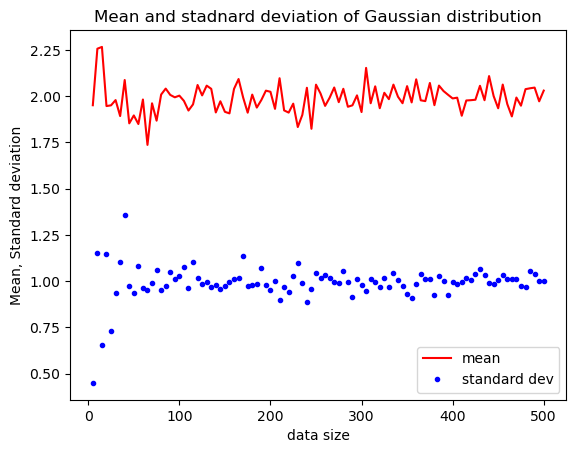

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mean = 2.0
stdev = 1.0

mean_list, std_list = [],[]

for s in range(5,505,5):
    data = np.random.normal(2.0, 1.0, size = s)
    mean_list.append(np.mean(data))
    std_list.append(np.std(data))

plt.plot(range(5,505,5), mean_list, 'r', label = 'mean')
plt.plot(range(5,505,5), std_list,  'b.', label = 'standard dev')
plt.ylabel('Mean, Standard deviation')
plt.legend()
plt.xlabel('data size')
plt.title('Mean and stadnard deviation of Gaussian distribution')
plt.show()

Example 13.17: Radioactive decay and the Poisson distribution

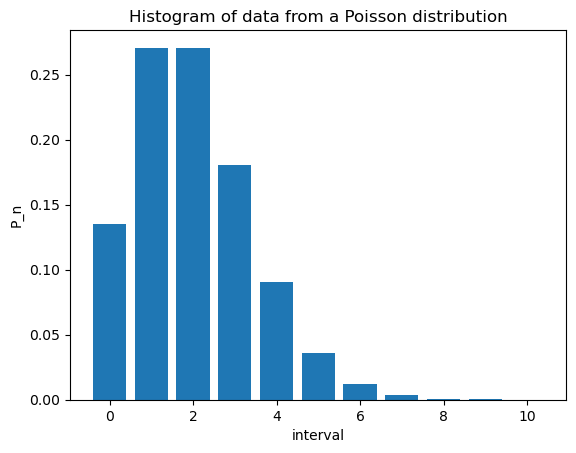

In [ ]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

mu = 2

def p_n(n):
    return (mu**n)/factorial(n) * np.exp(-mu)

intervals = np.arange(0,11,1)
counts = []

for n in intervals:
    counts.append(p_n(n))

plt.bar(intervals,counts);
plt.ylabel('P_n')
plt.xlabel('interval')
plt.title('Histogram of data from a Poisson distribution')
plt.show()
